<a href="https://colab.research.google.com/github/sonavmorris/DATASCIENCE-LAB/blob/main/co4_prgm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
y_test2=y_test.copy()

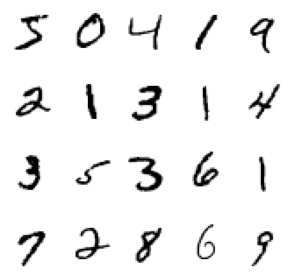

In [4]:
plt.figure(figsize=(5,5))
for i in range(20):
  plt.subplot(4,5,i+1);
  plt.imshow(x_train[i],cmap='Greys');
  plt.axis('off');
plt.show()


In [ ]:
x_test.shape

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train=x_train.reshape(60000,784).astype('float32')
x_test=x_test.reshape(10000,784).astype('float32')

In [ ]:
x_test.shape

In [9]:
x_test/=255
x_test/=255

In [10]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
n_classes=10
y_train=keras.utils.np_utils.to_categorical(y_train,n_classes)
y_test=keras.utils.np_utils.to_categorical(y_test,n_classes)

In [12]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
model=keras.Sequential()

In [18]:
model.add(keras.layers.Dense(64,activation='sigmoid',input_shape=(784,)))

In [19]:
model.add(keras.layers.Dense(10,activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='mean_squared_error',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])

In [27]:
history = model.fit(x_train, y_train, batch_size = 70, epochs = 75, verbose = 1)

Epoch 1/75
858/858 [==============================] - 3s 3ms/step - loss: 0.0869 - accuracy: 0.2493
Epoch 2/75
858/858 [==============================] - 3s 3ms/step - loss: 0.0742 - accuracy: 0.4245
Epoch 3/75
858/858 [==============================] - 3s 3ms/step - loss: 0.0656 - accuracy: 0.5349
Epoch 4/75
858/858 [==============================] - 2s 3ms/step - loss: 0.0584 - accuracy: 0.6278
Epoch 5/75
858/858 [==============================] - 3s 3ms/step - loss: 0.0521 - accuracy: 0.6966
Epoch 6/75
858/858 [==============================] - 3s 3ms/step - loss: 0.0468 - accuracy: 0.7409
Epoch 7/75
858/858 [==============================] - 3s 3ms/step - loss: 0.0425 - accuracy: 0.7719
Epoch 8/75
858/858 [==============================] - 2s 3ms/step - loss: 0.0390 - accuracy: 0.7941
Epoch 9/75
858/858 [==============================] - 2s 3ms/step - loss: 0.0362 - accuracy: 0.8110
Epoch 10/75
858/858 [==============================] - 3s 3ms/step - loss: 0.0338 - accuracy: 0.8249

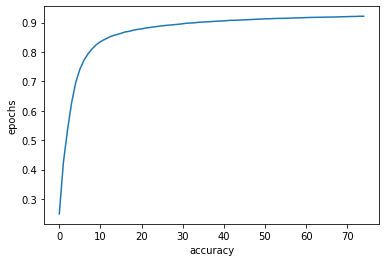

In [29]:
plt.plot(history.history['accuracy'])
plt.xlabel('accuracy')
plt.ylabel('epochs')
plt.show()

In [30]:
pred=model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [31]:
ar=[]
for a,i in enumerate(pred):
  ar.append(np.argmax(i))

In [32]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
ar=np.array(ar)

In [34]:
from sklearn import metrics

In [35]:
print(metrics.accuracy_score(y_test2,ar))

0.1032
